# Exercises

<font color=red>I added my comments in italic with the red caption "comment" below the corresponding figures.</font>

## Exercise 1: explore filter parameters
---
In this exercises you will explore how different parameters affect the filtering process.
- Import the data form `data/moving_lfp.pickle`
- Take a few seconds of the data, and filter them in different frequency bands. Plot the resulting singal.
  Try and fix a central frequency and play with the width of the band, then try to change the central frequency of the band.
- Try to change the order of the filter, for a fixed frequency band. How does the filtered signal change? How does the computing time change? (You can try to quantify the computing time with the jupyter magic commeand [`%timeit`](https://docs.python.org/3/library/timeit.html) )
- Comment on what you see

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data
import lfp_functions as lf

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False,
                     'image.cmap':plt.cm.jet})

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [2]:
with open('data/moving_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)
    
lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


In [3]:
low_time = 2000    # set time range of data
high_time = 4000
plot_offset = 300 #to plot the signal on different lines

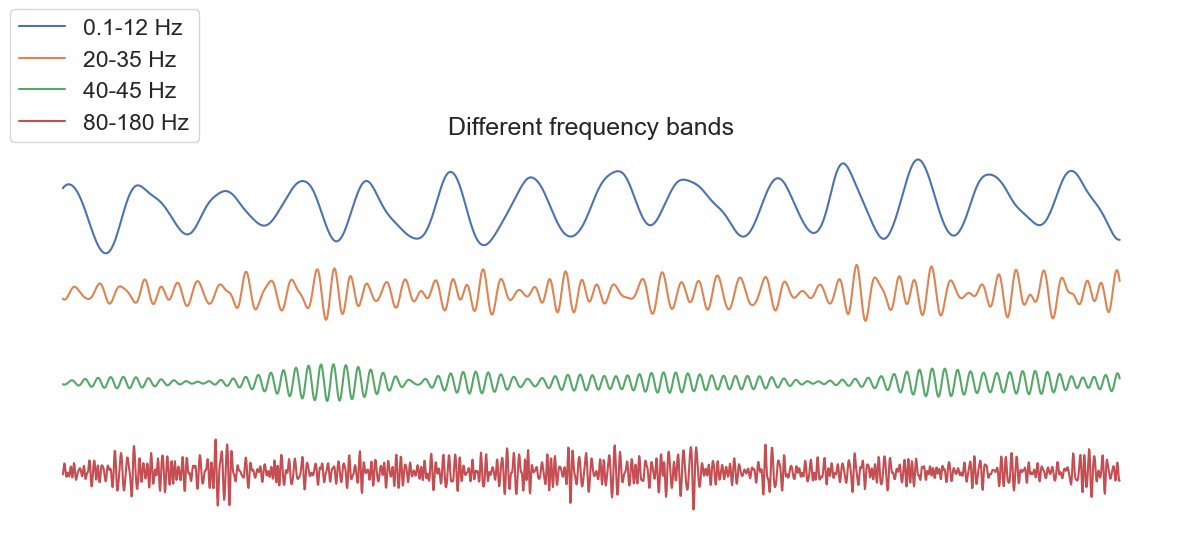

In [4]:
numb_bandp = 4  # number of bandpasses

_lfp = numb_bandp*[None]
low_f_ = [0.1 ,20, 40, 80]
high_f_ = [12,35,45,180]
label_lfp = ['0.1-12 Hz', '20-35 Hz', '40-45 Hz', '80-180 Hz']

for i in range(0,numb_bandp):
    _lfp[i] = lf.bandpass_filter(lfp,low_f=low_f_[i],high_f=high_f_[i], sampling_rate=sampling_rate)

plt.figure(figsize=(15,5))
plt.title("Different frequency bands")
for i in range (0,numb_bandp):
    plt.plot(_lfp[i][low_time:high_time]+(numb_bandp-i)*plot_offset,label=label_lfp[i])

plt.axis('off')
plt.legend(loc=(0,1))

#### <font color=red>Comment</font>
*For lower frequency bands the signal (obviously) shows slower oscillations.*

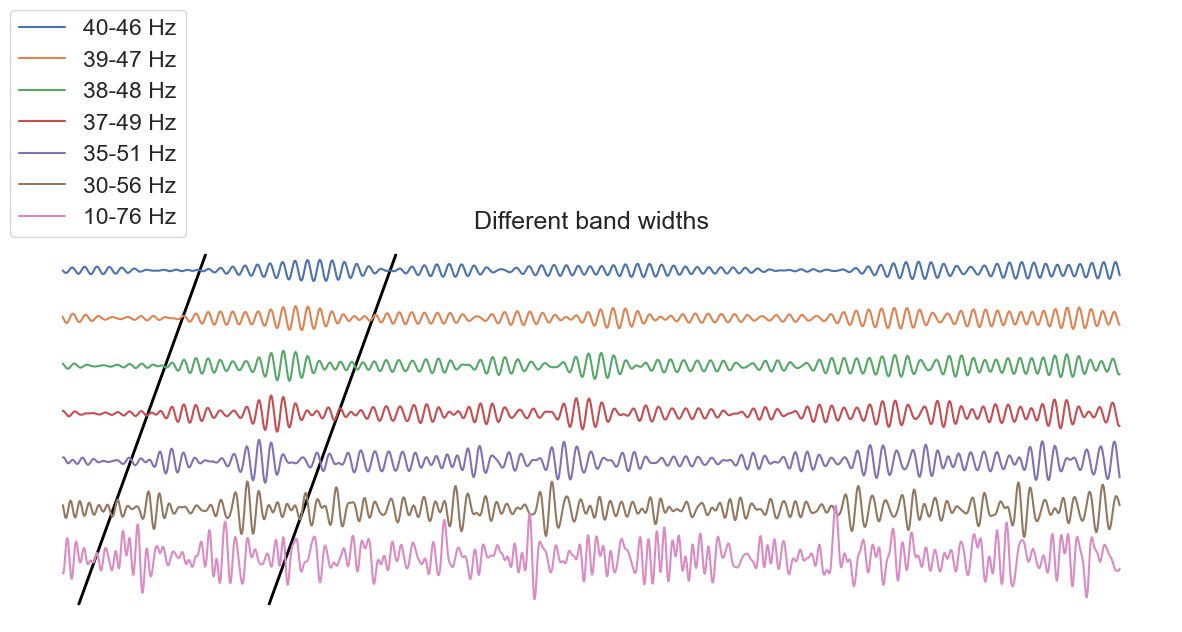

In [5]:
# central frequency 43 Hz

low_f_cf43Hz = [40,39,38,37,35,30,10]
high_f_cf43Hz = [46,47,48,49,51,56,76]
lfp_cf43Hz = len(low_f_cf43Hz)*[None]
label_lfp_cf43Hz = ['40-46 Hz','39-47 Hz','38-48 Hz','37-49 Hz','35-51 Hz','30-56 Hz','10-76 Hz']

plt.figure(figsize=(15,5))
plt.title("Different band widths")

for i in range(0,7):
    lfp_cf43Hz[i] = lf.bandpass_filter(lfp,low_f=low_f_cf43Hz[i],high_f=high_f_cf43Hz[i],sampling_rate=sampling_rate)
    plt.plot(lfp_cf43Hz[i][low_time:high_time]+(7-i)*plot_offset,label=label_lfp_cf43Hz[i])

plt.axis('off')
plt.legend(loc=(0,1))
plt.arrow(270, 2200, -240, -2200, width = 3, color='black', head_width=0)
plt.arrow(630, 2200, -240, -2200, width = 3, color='black', head_width=0)

#### <font color=red>Comment</font>
*For small bands we can easily see the central frequency as an underlying higher frequency oscillation (carrier signal) in the signal and an 'envelope' signal that creates 'wavelets'. For larger band width, the carrier frequency stays distinct but the envelope changes. With additional frequencies the wavelets change shape, sometimes split up, and move to the left (cf. the signal between the black lines); the maximal amplitude rises and the signal becomes less uniform (as we would except since more frequencies are added that add to the total amplitude, and allow for mor precise shaping of the signal and sharper changes in shape).*

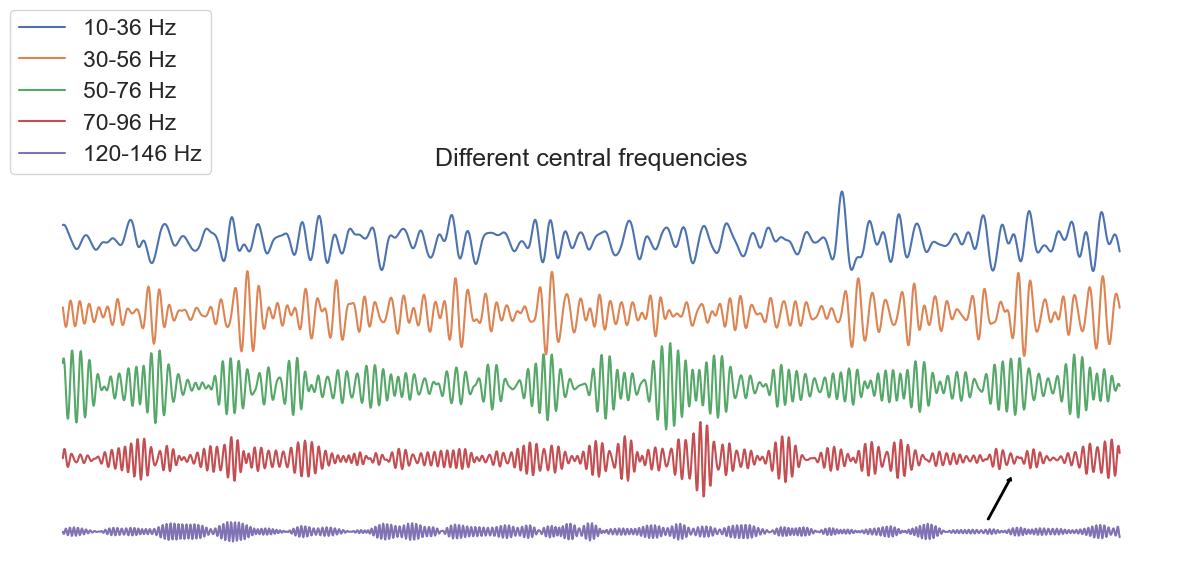

In [6]:
# Band width of 26Hz

low_f_bw26Hz = [10,30,50,70,120]
high_f_bw26Hz = [36,56,76,96,146]
lfp_bw26Hz = len(low_f_bw26Hz)*[None]
label_lfp_bw26Hz = ['10-36 Hz','30-56 Hz','50-76 Hz','70-96 Hz','120-146 Hz']

plt.figure(figsize=(15,5))
plt.title('Different central frequencies')

for i in range(0,5):
    lfp_bw26Hz[i] = lf.bandpass_filter(lfp,low_f=low_f_bw26Hz[i],high_f=high_f_bw26Hz[i], sampling_rate=sampling_rate)
    plt.plot(lfp_bw26Hz[i][low_time:high_time]+(5-i)*plot_offset,label=label_lfp_bw26Hz[i])

plt.axis('off')
plt.legend(loc=(0,1))
plt.arrow(1750, 350, 40, 160, width = 3, color='black')

#### <font color=red>Comment</font>
*The carrier frequency of the signal changes (becomes higher for higher central frequencies). The signal of bandwidths that don't overlap can drastically differ from each other if they don't carry similar information that is stored in multiple frequencies.*

*E.g. the green and red signal seem to have common features in their general shape becasue they slightly overlap. If the red signal was be composed of frequencies 76-102 Hz, the two small wavelets on the right (black arrow) that correspond to the two wavelets on the right of the green signal would vanish.*

 Execution time: 

  Order  2 
14.2 ms ± 363 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

  Order  4 
18.3 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)

  Order  6 
26.3 ms ± 862 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

  Order  8 
31.6 ms ± 3.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

  Order 10 
36.7 ms ± 4.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

  Order 12 
50.3 ms ± 431 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)




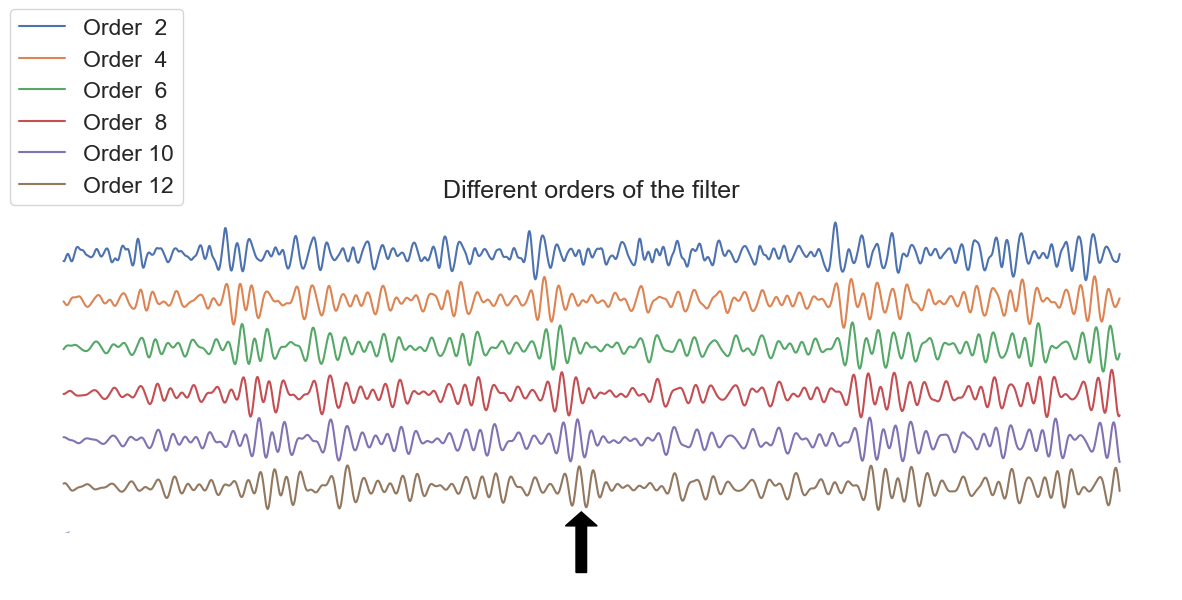

In [7]:
filter_order_ = [2,4,6,8,10,12]
lfp_ord = 6*[None]
label_ord = ['Order  2','Order  4','Order  6','Order  8','Order 10','Order 12']

plt.figure(figsize=(15,5))
for i in range(0,6):
    lfp_ord[i] = lf.bandpass_filter(lfp,low_f=20,high_f=45, sampling_rate=sampling_rate, filter_order=filter_order_[i])
    plt.plot(lfp_ord[i][low_time:high_time]+(6-i)*plot_offset,label=label_ord[i])

plt.axis('off')
plt.arrow(2, 4, 2, 2, width = 5)
plt.legend(loc=(0,1))
plt.title('Different orders of the filter')
plt.arrow(980, -250, 0, 300, width = 20, color='black')
print(color.UNDERLINE,'Execution time:',color.END)

for i in range(0,6):
    print('\n',color.BOLD, label_ord[i], color.END)
    %timeit lfp_ord[i] = lf.bandpass_filter(lfp,low_f=20,high_f=45, sampling_rate=sampling_rate, filter_order=filter_order_[i])
print('\n')



#### <font color=red>Comment</font>
*Raising the order of the filter increases the computation time. On the larger scale, the filtered signal seems to only exhibit a temporal shift to the right. However, the signal itself also shows small changes, e.g. the phase differs (cf. the black arrow: the wavelet-like structure stays the same for all orders, but the phase inside the wavelet changes) and the details of the signals change (compare the signal right and left of the arrow; for higher orders, some features of the signal are filtered).*

## Exercise 2: wavelet transform with real wavelets
---
In this exercises you will explore the difference between real and complex wavelets in the continous wavelet transform.
- Import the data form `data/moving_lfp.pickle`
- Select a period of a few seconds of the signal and compute the spectrogram. 
  Try the wavelet transform with wavelet `mexh` (mexican hat),`gaus` (gaussian) and `morl` (morlet). this are all real wavelet.
- How does the spectrum look different from what we computed with a complex Morlet tranform ? Comment on why do you think this might be the case.

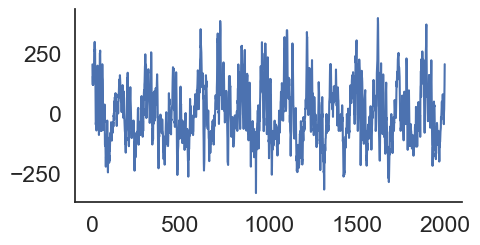

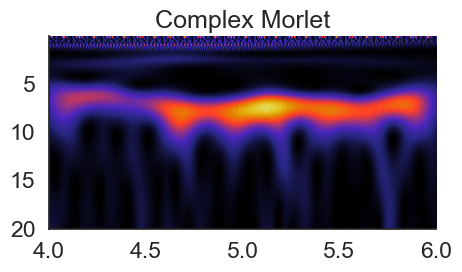

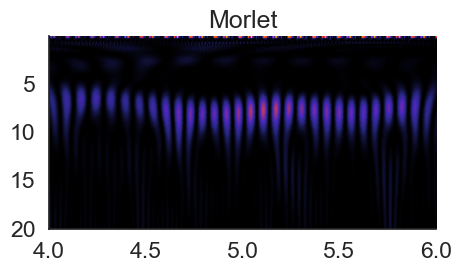

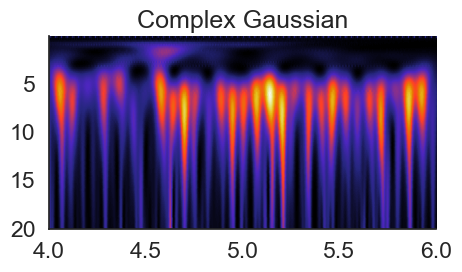

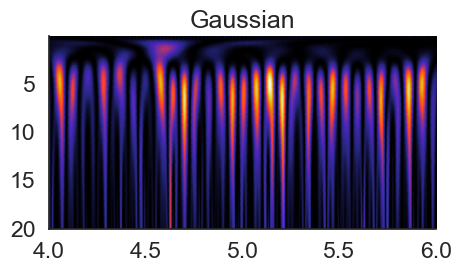

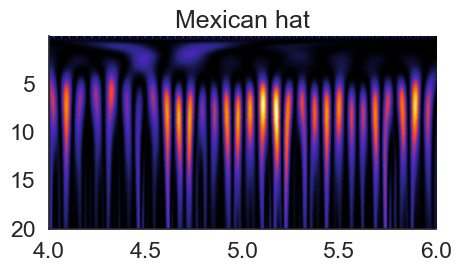

In [8]:
from scipy import signal
import pywt
from pywt import scale2frequency
from pywt import cwt

start = 4 #in seconds
end = 6 # in seconds

sig = lfp[int(start*sampling_rate):int(end*sampling_rate)]
sig = sig - np.mean(sig) # get rid of 0 frequency component

figsize_ = [5,2.5]
plt.figure(figsize=(figsize_[0],figsize_[1]))
plt.plot(sig)
frequencies =  np.linspace(0.1,20,100)/sampling_rate


#spectrogram with complex morlet transform

wavelet = 'cmor1.0-1.0'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(figsize_[0],figsize_[1]))
plt.title('Complex Morlet')
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')

#spectrogram with morlet transform

wavelet = 'morl'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(figsize_[0],figsize_[1]))
plt.title('Morlet')
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')

#spectrogram with complex gauss transform

wavelet = 'cgau1'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(figsize_[0],figsize_[1]))
plt.title('Complex Gaussian')
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')

#spectrogram with gauss transform

wavelet = 'gaus1'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(figsize_[0],figsize_[1]))
plt.title('Gaussian')
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')


#spectrogram with mexican hat transform

wavelet = 'mexh'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(figsize_[0],figsize_[1]))
plt.title('Mexican hat')
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')


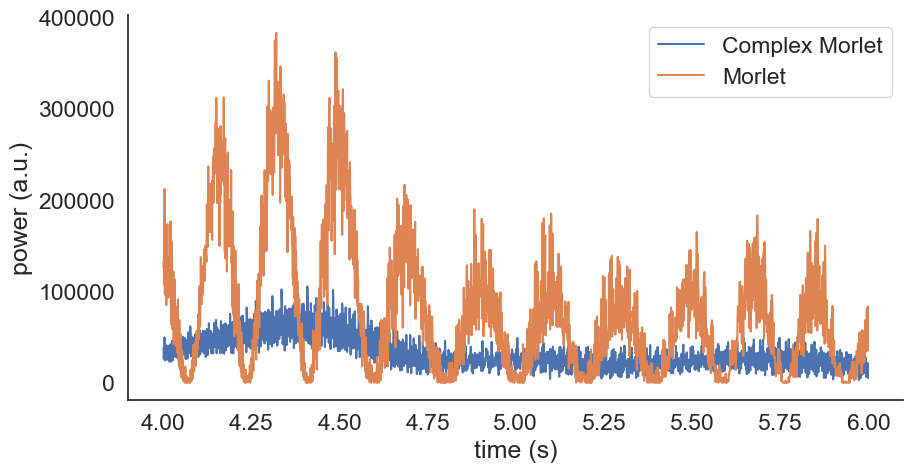

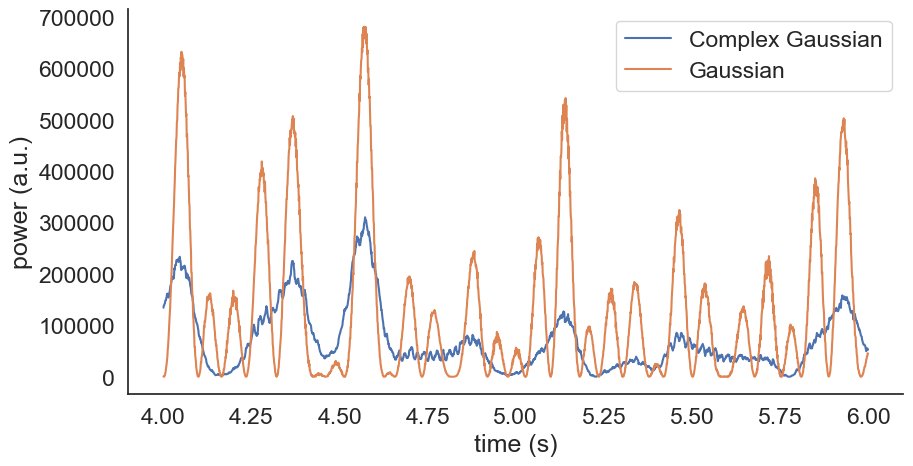

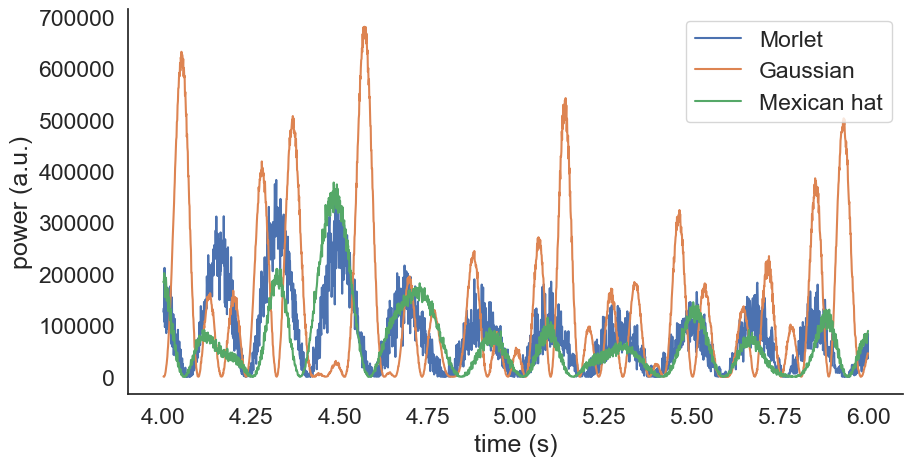

In [9]:
from pywt import scale2frequency
from pywt import cwt

start = 4 #in seconds
end = 6 # in seconds

sig = lfp[int(start*sampling_rate):int(end*sampling_rate)]
sig = sig - np.mean(sig) # get rid of 0 frequency component

frequencies =  np.linspace(3,10,500)/sampling_rate
wavelet = ['cmor1.0-1.0','cgau1','morl','gaus1','mexh']
scales = 5*[0]
power = 5*[0]
label_= ['Complex Morlet', 'Complex Gaussian', 'Morlet','Gaussian', 'Mexican hat']

figsize_2 = [10,5]

for i in range(0,5):
    scales = scale2frequency(wavelet[i], frequencies)
    cwtmatr, _ = cwt(sig, wavelet=wavelet[i], scales=scales[i],
                  sampling_period=1.0/sampling_rate)
    power[i] = np.mean(abs(cwtmatr)**2,axis=0)

plt.figure(figsize=(figsize_2[0],figsize_2[1]))
for i in [0,2]:
    plt.plot(np.linspace(start,end,len(power[i])),power[i], label = label_[i])
plt.xlabel('time (s)')
plt.ylabel('power (a.u.)')
plt.legend(loc='upper right')


plt.figure(figsize=(figsize_2[0],figsize_2[1]))
for i in [1,3]:
    plt.plot(np.linspace(start,end,len(power[i])),power[i], label = label_[i])
plt.xlabel('time (s)')
plt.ylabel('power (a.u.)')
plt.legend(loc='upper right')

plt.figure(figsize=(figsize_2[0],figsize_2[1]))
for i in range(2,5):
    plt.plot(np.linspace(start,end,len(power[i])),power[i], label = label_[i])
plt.xlabel('time (s)')
plt.ylabel('power (a.u.)')
plt.legend(loc='upper right')

#### <font color=red>Comment</font>
*The complex wavelets create a temporally continuous spectogram whereas the real wavelets create discrete spectograms. I suppose that through incorporation of the time-dependent phase the complex wavelet transform interpolates the spectogram inbetween the discrete ripples.*

*The Gaussian wavelet is the broadest whereas the Morlet wavelet is the most distinct. When comparing the oscillation power we see that the Mexican hat and the Morlet wavelet are very similar in shape and amplitude, whereas the Gaussian wavelet has a much higher amplitude and each peak is split into two peaks. This could be caused by the fact that the Gaussian wavelet consists of a maximum and minimum (compared to the Morlet, which consists of an envelope maximum, and the Mexican hat, which has a maximum and two very small minima); these might result in the two temporally shorter and higher peaks which also highlights the discreteness of the spectrogram. In the complex Gaussian these two peaks are blended together.*

*The Gaussian filtered signal is the smoothest, the Morlet filtered signal the least smooth signal (probably because the Gaussian/Morlet wavelet is very smooth/rippled). For the same reason, the Gaussian spectogram assignes high powers to a lot of frequencies at a given time whereas the Morlet spectrum assignes lower powers to a very limited band of lower frequencies.*

## Exercise 3: REM sleep detection
---
Mammalian sleep is organized in different phases. [Rapid Eye Movement (REM) sleep](https://en.wikipedia.org/wiki/Rapid_eye_movement_sleep) is a well studied phase, with clear markers that make it detectable from LFP data. One of the most used marker is the ratio (or difference) between the oscillatory power in the theta and delta bands in the hippocampus. During REM sleep, the former dominates, in a pattern that resembles active behaviour.  
In this exercise we will use the tools we learned about to detect and inspect the REM and non-REM (nREM) phases of sleep in data recorded from the hippocampus of a sleeping mouse.

- Import the data form `data/moving_lfp.pickle`
- Compute the instantaneous power in the theta (6-10 Hz) and delta (2-4 Hz) frequency bands, for the whole signal.
- z-score the two power signals (subtract the mean and divide by the standard deviation, you can use `scipy.stats.zscore()`)
- Compute and plot the power difference (`theta_power - delta_power`) for the sleep session.
- Compute the REM (power difference $>0.2$) and nREM (power diffewrence $<0.2$) sleep periods.
- Plot examples of REM vs nREM lfp signals (wideband filtered betw. 1 and 200 Hz to get rid of some of the noise).
- Explore how changing the threshold affects the amount of REM sleep detected.

In [10]:
from scipy import stats

with open('data/sleep_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

sleep_lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


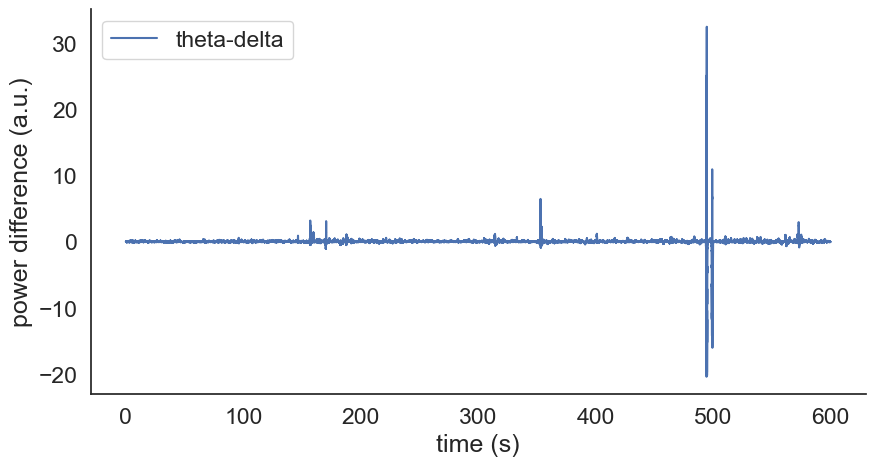

In [11]:
start = 0 #in seconds
end = 600 # in seconds
low_freq_ = [2,6]
high_freq_ = [4,10]

sig_sleep = sleep_lfp[int(start*sampling_rate):int(end*sampling_rate)]
sig_sleep = sig_sleep - np.mean(sig_sleep) # get rid of 0 frequency component

frequencies =  [np.linspace(low_freq_[0],high_freq_[0],100)/sampling_rate,np.linspace(low_freq_[1],high_freq_[1],100)/sampling_rate]
wavelet = 'cmor1.0-1.0'
label_= ['2-4 Hz', '6-10 Hz']
power = 2*[None]
zscore_ = 2*[None]

plt.figure(figsize=(10,5))

for i in range(0,2):
    scales = scale2frequency(wavelet, frequencies[i])
    cwtmatr, _ = cwt(sig_sleep, wavelet=wavelet, scales=scales[i],
                  sampling_period=1.0/sampling_rate)
    power[i] = np.mean(abs(cwtmatr)**2,axis=0)
    zscore_[i] = stats.zscore(power[i])
    

zscoredPower_diff = zscore_[1] - zscore_[0]
plt.plot(np.linspace(start,end,len(zscoredPower_diff)),zscoredPower_diff,label = 'theta-delta')
    
plt.xlabel('time (s)')
plt.ylabel('power difference (a.u.)')
#plt.ylim([-0.5,1.5])
plt.legend()

In [12]:
def ripple_idxs(ripple_mask):
    '''
    Takes logical ripple mask and returns a list of arrays. Each array correspond to a ripple
    and contains its time idxs (relative to the provided ripple mask)
    '''
    ripple_starts = []
    ripple_ends = []
    for i in range(1, len(ripple_mask)):
        if ripple_mask[i-1] == 0 and ripple_mask[i] == 1:
            ripple_starts.append(i)
        if ripple_mask[i-1] == 1 and ripple_mask[i] == 0:
            ripple_ends.append(i)

    # handle edge cases
    if len(ripple_ends) > len(ripple_starts):
        ripple_starts = [0]+ripple_starts  # if session starts with a ripple

    if len(ripple_ends) < len(ripple_starts):
        ripple_ends.append(len(ripple_mask))  # if session ends with a ripple

    ripples = [np.arange(ripple_starts[i], ripple_ends[i])
               for i in range(len(ripple_starts))]

    return ripples

def clean_ripples(ripples,lfp,ripple_len_th=None,amplitude_th=None):
    '''takes list of ripples and corresponding signal, returns list of ripples cleaned of ripple that are shorter than specified 
    duration threshold or with amplitude larger than specified amplitude threshold (usually artifacts)'''
    clean_ripples = [r for r in ripples if (len(r)>ripple_len_th and \
                    max(lfp[r])< amplitude_th and min(lfp[r])>-amplitude_th)] 
    return clean_ripples

Threshold:  0.2 
 detected 146 ripples

Threshold:  0.3 
 detected 66 ripples

Threshold:  0.4 
 detected 38 ripples

Threshold:  0.6 
 detected 15 ripples

Threshold:  1 
 detected 6 ripples

Threshold:  1.5 
 detected 3 ripples

Threshold:  2.91 
 detected 1 ripples



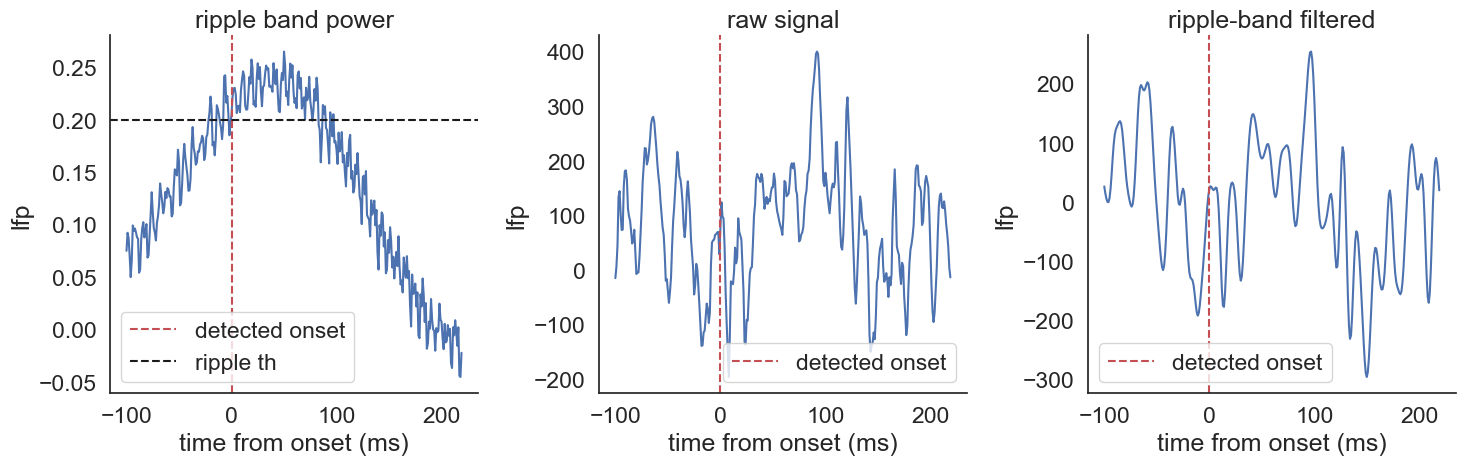

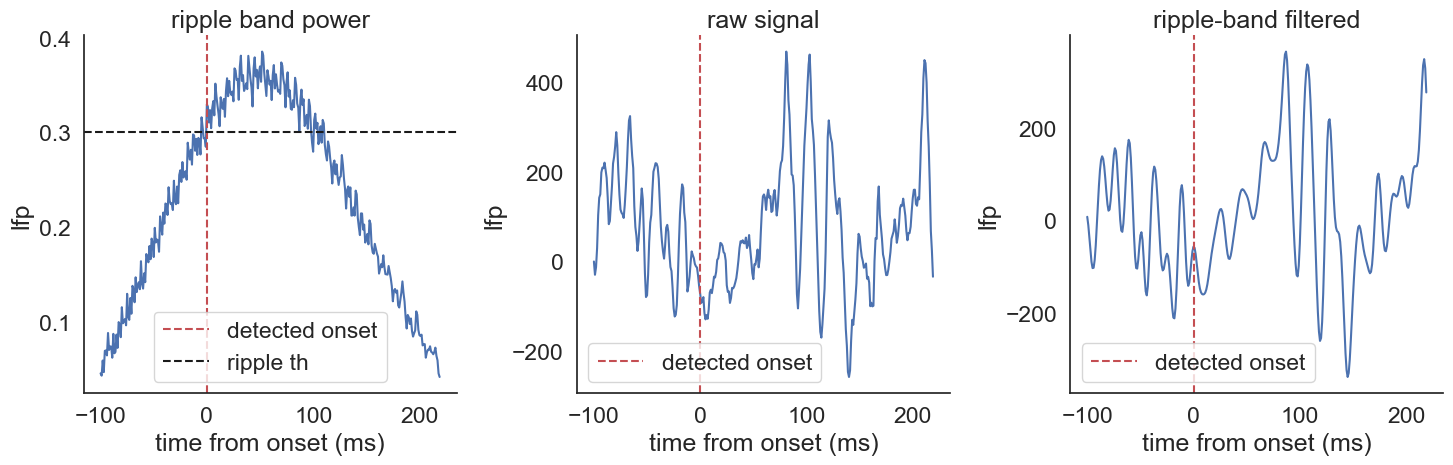

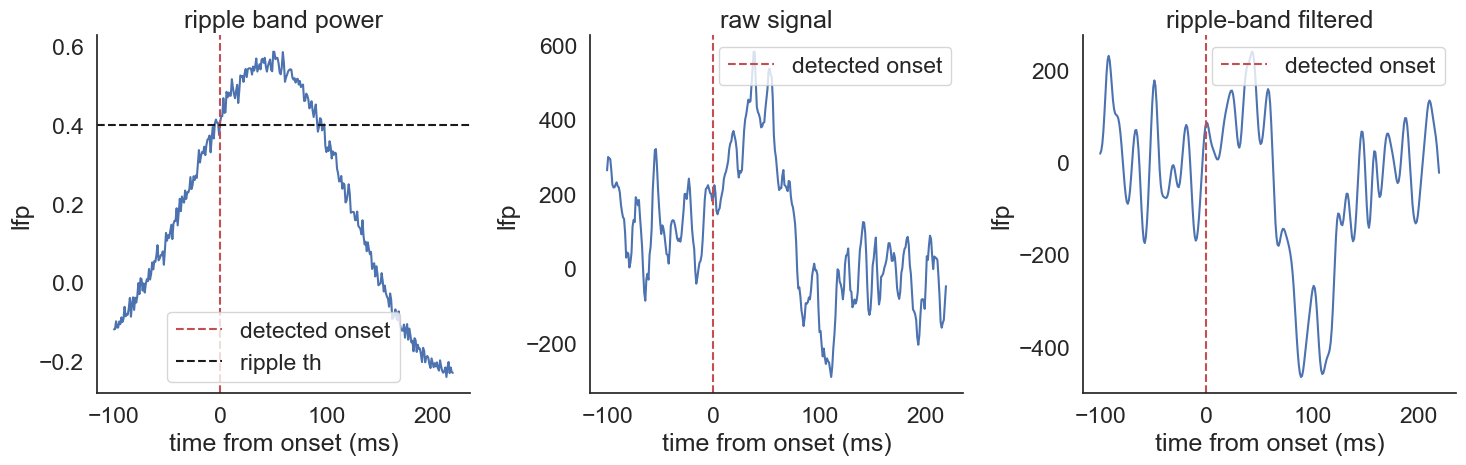

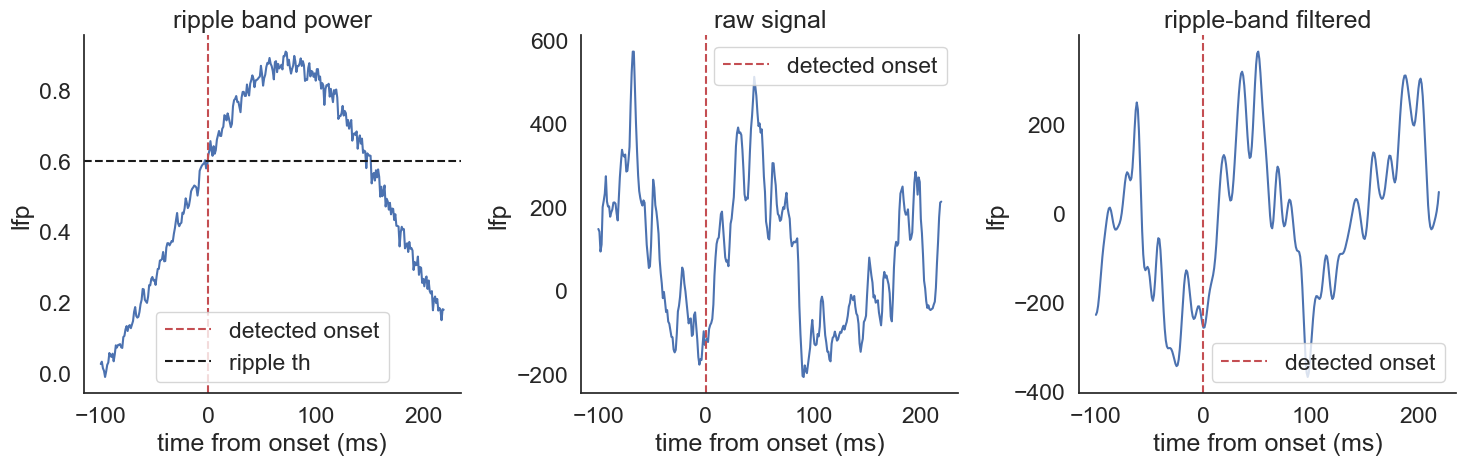

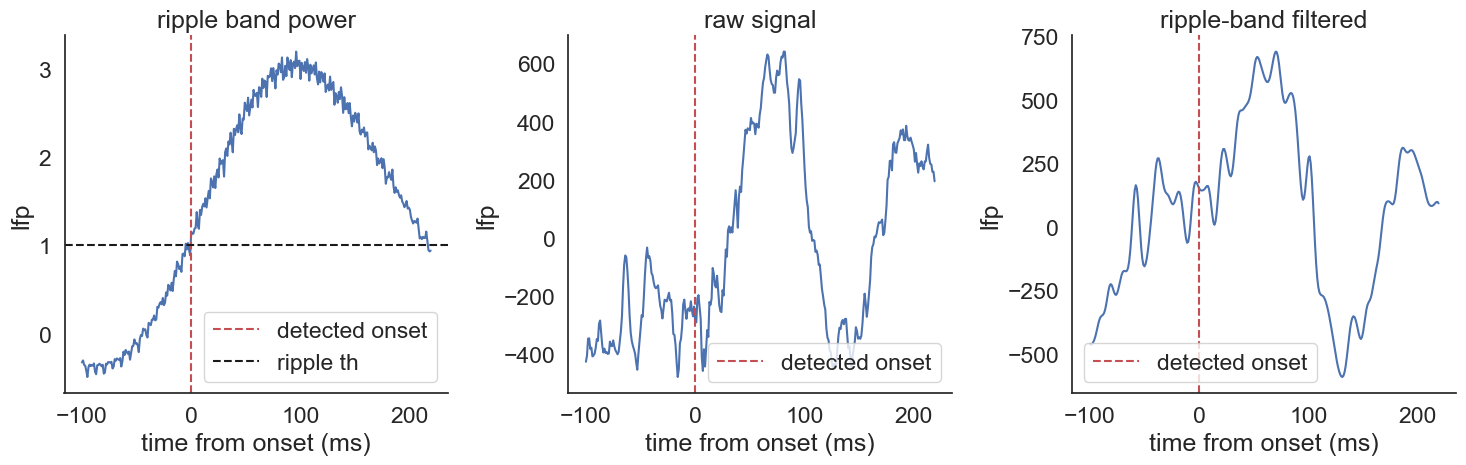

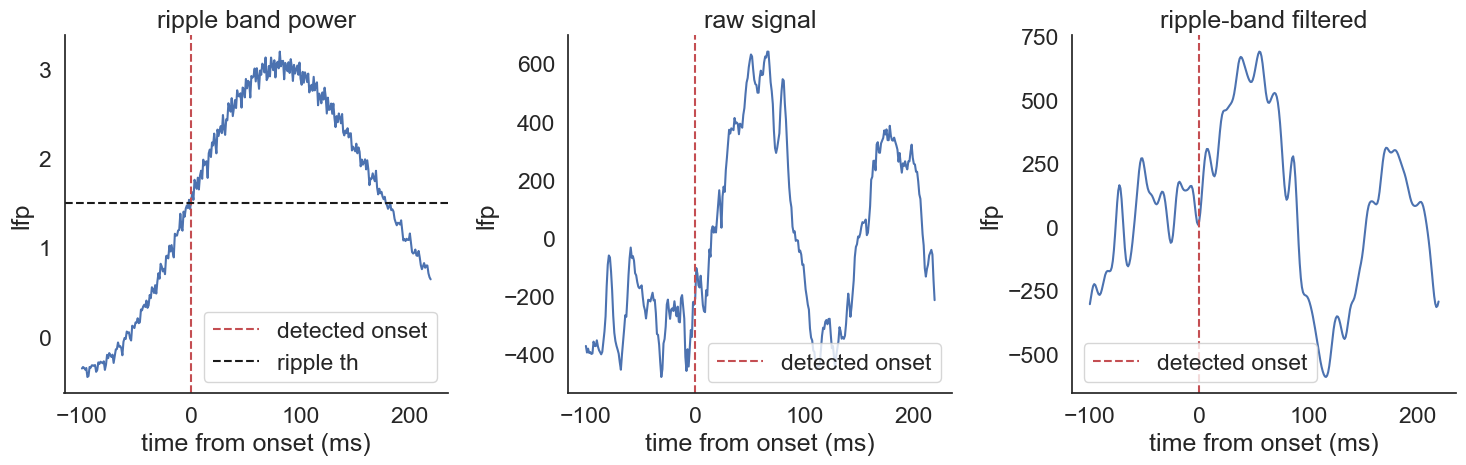

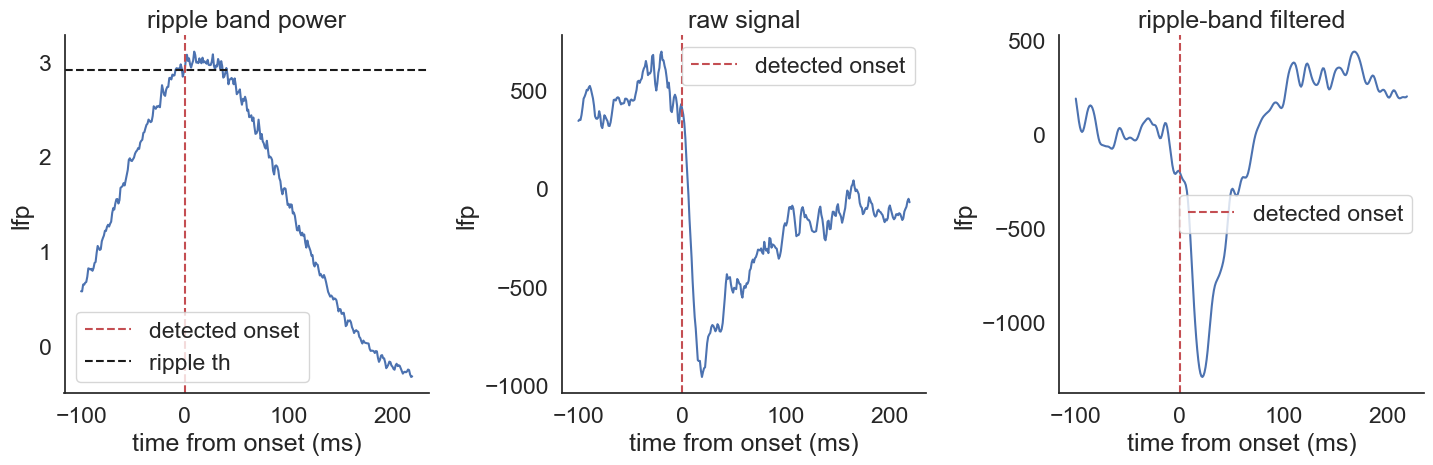

In [13]:
ripple_th = [0.2,0.3,0.4,0.6,1,1.5,2.91]
ripple_n = [0]
ripple_lfp = lf.bandpass_filter(sleep_lfp,low_f=1,high_f=100, sampling_rate=sampling_rate)
ripple_range = [-100,220]


for i in range(0,len(ripple_th)):
    ripple_mask = np.asarray([True if x>ripple_th[i] else 0 for x in zscoredPower_diff])
    ripples = ripple_idxs(ripple_mask)
    ripples = clean_ripples(ripples,sleep_lfp,ripple_len_th=30, amplitude_th=1000)
    print('Threshold: ',ripple_th[i],'\n',f'detected {len(ripples)} ripples\n')
    #print(ripples[0][0],ripples[0][len(ripples[0])-1])
    for j in ripple_n:#range(0,ripple_n):
        plt.figure(figsize=(15,5))

        plt.subplot(1,3,1)
        onset = ripples[j][0]
        x = np.arange(ripple_range[0],ripple_range[1])
        y = zscoredPower_diff[onset+ripple_range[0]:onset+ripple_range[1]]
        plt.plot(x,y)
        plt.axvline(x=0,linestyle='--',c='r',label='detected onset')
        plt.axhline(y=ripple_th[i],linestyle='--',c='k',label='ripple th')

        plt.title('ripple band power')
        plt.xlabel('time from onset (ms)')
        plt.ylabel('lfp')
        plt.legend()

        plt.subplot(1,3,2)
        onset = ripples[j][0]
        x = np.arange(ripple_range[0],ripple_range[1])
        y = sleep_lfp[onset+ripple_range[0]:onset+ripple_range[1]]
        plt.plot(x,y)
        plt.axvline(x=0,linestyle='--',c='r',label='detected onset')
        plt.title('raw signal')
        plt.xlabel('time from onset (ms)')
        plt.ylabel('lfp')
        plt.legend()

        plt.subplot(1,3,3)
        onset = ripples[j][0]
        x = np.arange(ripple_range[0],ripple_range[1])
        y = ripple_lfp[onset+ripple_range[0]:onset+ripple_range[1]]
        plt.plot(x,y)
        plt.axvline(x=0,linestyle='--',c='r',label='detected onset')
        plt.title('ripple-band filtered')
        plt.xlabel('time from onset (ms)')
        plt.ylabel('lfp')
        plt.legend()
        plt.tight_layout()

#### <font color=red>Comment</font>
*For very small thresholds such as 0.2 a lot of ripples are detected. It is important to find a threshold that is sufficiently high so most of the detected ripples are events of interest, but at the same time low enough so that so many interesting events with low amplitudes are filtered.*

*I don't know why the filtered ripple band looks so different from the one in the lecture, but I suppose it is due to the fact that here, we are looking at ripples in the* difference *of the theta and delta band and then plot the* original *signal.*